In [2]:
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
import pandas as pd
import random
import numpy as np
from preprocessing.segmentation import otsu_thresholding

In [3]:
BASE_PATH_TR = Path("data/LivDet2015/Training")
BASE_PATH_TE = Path("data/LivDet2015/Testing")

In [4]:
LIVE_IMAGES = list(BASE_PATH_TR.glob("**/Live/*.bmp"))

In [5]:
len(LIVE_IMAGES)

6950

In [6]:
live_images = pd.concat([pd.Series(LIVE_IMAGES).astype(str), pd.Series([1]*len(LIVE_IMAGES)).astype(int)], axis=1)
live_images.head()

,0,1
0,data/LivDet2015/Training/CrossMatch/Live/09744...,1
1,data/LivDet2015/Training/CrossMatch/Live/30889...,1
2,data/LivDet2015/Training/CrossMatch/Live/25127...,1
3,data/LivDet2015/Training/CrossMatch/Live/16228...,1
4,data/LivDet2015/Training/CrossMatch/Live/70102...,1


In [7]:
FAKE_IMAGES = list(BASE_PATH_TR.glob("**/Fake/**/*.bmp"))

In [8]:
len(FAKE_IMAGES)

6968

In [9]:
fake_images = pd.concat([pd.Series(FAKE_IMAGES).astype(str), pd.Series([0]*len(FAKE_IMAGES)).astype(int)], axis=1)
fake_images.head()

,0,1
0,data/LivDet2015/Training/CrossMatch/Fake/Body ...,0
1,data/LivDet2015/Training/CrossMatch/Fake/Body ...,0
2,data/LivDet2015/Training/CrossMatch/Fake/Body ...,0
3,data/LivDet2015/Training/CrossMatch/Fake/Body ...,0
4,data/LivDet2015/Training/CrossMatch/Fake/Body ...,0


In [10]:
training_data = pd.concat([live_images, fake_images])
training_data = training_data.sample(frac = 1, random_state = 42).reset_index(drop = True)
training_data.head()

,0,1
0,data/LivDet2015/Training/Time_Series/Live/8801...,1
1,data/LivDet2015/Training/Hi_Scan/Fake/Ecoflex ...,0
2,data/LivDet2015/Training/Hi_Scan/Fake/Latex/01...,0
3,data/LivDet2015/Training/Time_Series/Fake/Play...,0
4,data/LivDet2015/Training/CrossMatch/Fake/Ecofl...,0


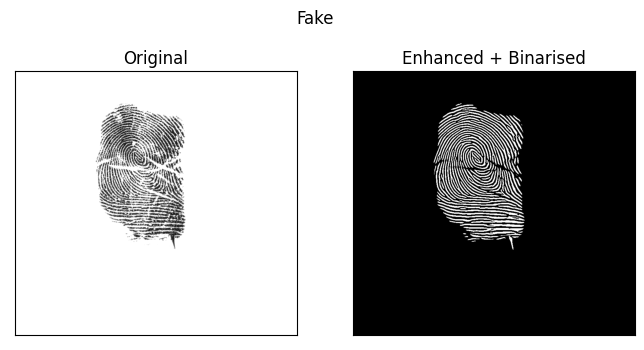

In [11]:
from preprocessing.enhacement import ImageEnhancer

enhancer = ImageEnhancer()

idx = random.randint(0, len(training_data) - 1)
img = Image.open(training_data.iloc[idx][0])

img_arr = np.array(img)
enhanced = enhancer.enhance(img_arr)
threshold_img = otsu_thresholding(enhanced)

fig, ax = plt.subplots(1, 2, figsize = (8, 4))
for i, (img, a) in enumerate(zip([img_arr, threshold_img], ax.flat)):
    a.imshow(img, cmap="gray")
    a.set_title("Original" if i == 0 else "Enhanced + Binarised")
    a.set_xticks([])
    a.set_yticks([])


fig.suptitle("Live" if training_data.iloc[idx][1] == 1 else "Fake")
plt.show()

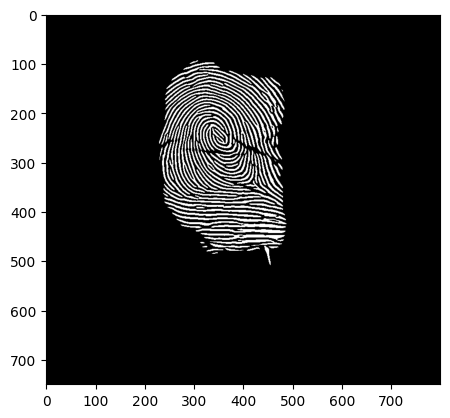

In [14]:
plt.imshow(enhanced, cmap="gray")

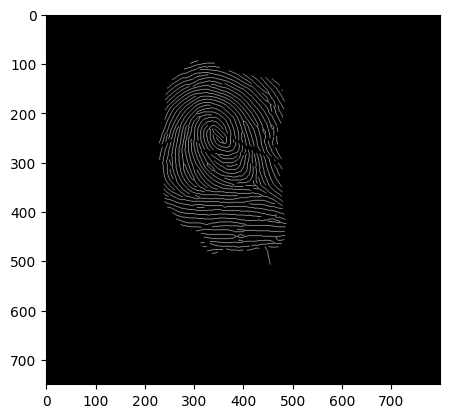

In [15]:
import skimage
img = skimage.morphology.skeletonize(enhanced)
plt.imshow(img, cmap="gray")

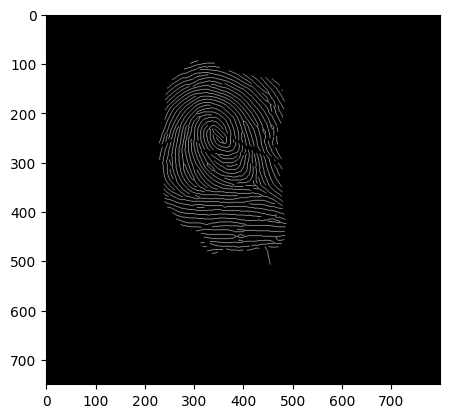

In [16]:
plt.imshow(np.uint8(img * 255), cmap="gray")

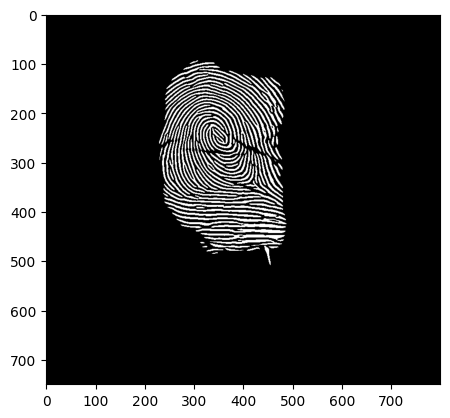

In [17]:
plt.imshow(np.uint8(enhanced * 255), cmap="gray")